# TP1  L'algorithme génétique 

### L’algorithme génétique est constitué d'une population d’individus qui évolue par application des opérateurs génétiques issus de la théoriede Darwin. Chaque individu représente une solution candidate à un problème donné. Un codage binaire ou réel sera utilisé selon la nature du problème à résoudre. 
### L’algorithme génétique est itératif et commence avec une population initialisée  aléatoirement dans l’espace de recherche. 
### Durant chaque itération, la fitness de chaque individu de la population est évaluée; la fitness représente la fonction objective du problème qu’on veut optimiser.  Les individus de la population les mieux adaptés ont plus de cho  ix d’être sélectionnés pour être combinés et éventuellement mutés et former une nouvelle population qui sera par la suite utilisée dans la prochaine itération de l’algorithme. 
### L’algorithme se termine quand le nombre maximum des itérations est atteint.

##  Application de l'algorithme génétique pour l'optimisation de fonctions

## On considère la fonction $$f(x)= 31x- x^2 $$  
## $x$ est un entier et $x$ ε $[0,31]$

## Proposer une implémentation d’un algorithme génétique AG avec un codage binaire pour trouver le maximum de la fonction f. 
 

In [1]:
import random
import matplotlib.pyplot as pl
import numpy as np
import random
import matplotlib.pyplot as pl
import numpy as np



In [2]:
## 1. Initialisation des paramètres de l'algorithme génétique

In [3]:
Npop = 50   # Taille population   (50 solutions candidates)
n = 5    # longueur du chromosome   les 5 cases codent la solution
Pr_cr = 0.9 # Probabilité de croisement
Pr_mut = 0.01 # Probabilité de mutation
Maxgen = 1000 # Nombre maximum d'itérations ou de générations


In [4]:
## 2. Définition de la fonction à optimiser : la fitness

In [5]:
# TODO
def fitness(x):
    return 31*x - x**2


In [6]:
print(fitness(2))

58


In [7]:
## 3. Initialisation de la population 

In [8]:
#  la population est une matrice de dimension Npop*(n+1)
#  un chromosome est une ligne de la matrice
#  un chromosome est de dimension 1*(n+1)  :  n cases codent la solution et la (n+1)ieme code sa fitness
# TODO
def initiale_population(Npop):
    population=[]
    for x in range(Npop):
        random_number = random.randint(0, 31)
        random_number_binary = format(random_number, '05b')
        population.append(random_number_binary)
    return population
print(initiale_population(Npop))


['11100', '10110', '00100', '00011', '10111', '01010', '10011', '00101', '01000', '11110', '00111', '11010', '01110', '01110', '00010', '01111', '00001', '01110', '01000', '11000', '00011', '01101', '01011', '01101', '10011', '01001', '00110', '10101', '11010', '11001', '11110', '11000', '10110', '00000', '00001', '00010', '10101', '00001', '10110', '11111', '11011', '00001', '10101', '11100', '11101', '11101', '00100', '00010', '01110', '11011']


In [9]:
## 4. Evaluation de la qualité de chaque solution 

In [10]:
# TODO
def evaluation_population(population):
    fitness_population = []
    for y in population:
        x = int(y, 2)  
        z= fitness(x)
        fitness_population.append(z)
    return fitness_population

print(evaluation_population(initiale_population(Npop)))
print( sum(evaluation_population(initiale_population(Npop))))

[184, 234, 220, 58, 30, 130, 220, 238, 0, 108, 220, 58, 240, 84, 150, 130, 84, 30, 198, 30, 130, 238, 130, 240, 238, 184, 228, 240, 220, 184, 150, 84, 58, 84, 210, 238, 84, 168, 84, 184, 234, 108, 0, 228, 228, 228, 210, 198, 220, 228]
6942


In [11]:
## 5. l'operateur selection par tournoi

In [12]:
def tournament_selection(population):
    selected = []
    fitnesses = []

    for i in population:
        chr_int = int(i, 2)
        chr_fitness = fitness(chr_int)

        fitnesses.append(chr_fitness)

    total_fitness = sum(fitnesses)

    probability_fitness = []

    cumulative_fitnesses = np.cumsum([f / total_fitness for f in fitnesses])

    for _ in population:
        r = random.random()
        for i, cumulative_fitness in enumerate(cumulative_fitnesses):
            if r < cumulative_fitness:
                selected.append(population[i])
                break
    
    return selected

In [13]:
## 6. L'opérateur crossover

In [14]:
def crossover(population, Pr_cr):
    descendants = []

    for i in range(0, len(population), 2):
        generation1 = population[i]
        generation2 = population[i + 1] if i + 1 < len(population) else population[i]

        if random.random() < Pr_cr:
            crossover_point = random.randint(1, len(generation1) - 1)
            new_generation1 = generation1[:crossover_point] + generation2[crossover_point:]
            new_generation2 = generation2[:crossover_point] + generation1[crossover_point:]
        else:
            new_generation1, new_generation2 = generation1, generation2

        descendants.extend([new_generation1, new_generation2])

    return descendants

In [15]:
## 7. L'opérateur de mutation

In [16]:
# Fonction d'opérateur de mutation
# TODO
def mutation(population, Pr_mut):
    mutated_population = []
    # x= random.random()

    for chr in population:
        mutated_chr = ""
        
        for gene in chr:
            if random.random() <= Pr_mut:
                mutated_gene = "0" if gene == "1" else "1"
            else:
                mutated_gene = gene
            
            mutated_chr += mutated_gene
        
        mutated_population.append(mutated_chr)

    return mutated_population
    
    


In [17]:
## 8. le programme principal

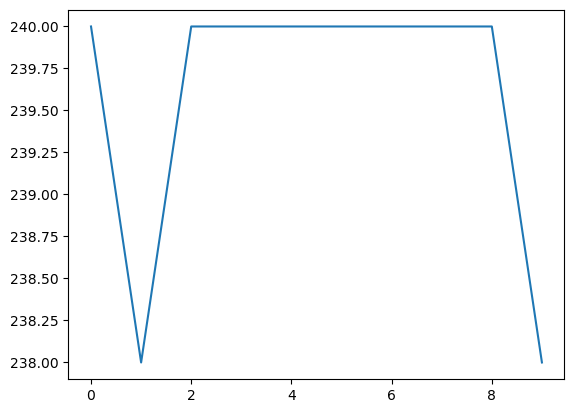

In [18]:

fit=[]   # contient le maximum fitness obtenue durant les 10 exécutions
for run in range(10):
    # génération de la population initiale
    population = initiale_population(Npop)
    # programme principal de l'algorithme genetique
    gen = 0
    while gen < Maxgen:
        # Evaluation
        fitness_population = evaluation_population(population)
         
        # selection
        selected_population = tournament_selection(population)
         
        # crossover 
        crossover_population = crossover(selected_population, Pr_cr)
         
        # mutation
        mutated_population = mutation(crossover_population, Pr_mut)
         
        # remplacement
        population = mutated_population
         
        gen += 1
    
    max_value = max(population, key=lambda ind: fitness(int(ind, 2)))
    fit.append(fitness(int(max_value, 2)))  
        
pl.plot(fit)
     
    



In [19]:
# Afficher la solution moyenne 

average=np.mean(fit)
 
print("la solution moyenne trouvée=",average)

la solution moyenne trouvée= 239.6
